# Load Dataset

In [1]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
X = iris.data
y = iris.target
tennis = pd.read_csv('tennis.csv')

# Full-training

In [2]:
from sklearn import tree
from sklearn.neural_network import MLPClassifier

clft = tree.DecisionTreeClassifier()
clft = clft.fit(X, y)

clfm = MLPClassifier(hidden_layer_sizes=(4), solver='sgd', learning_rate_init=0.01, max_iter=500)
clfm = clfm.fit(X, y)

## Modelling Tree

In [3]:
import graphviz 
dot_data = tree.export_graphviz(clft, out_file=None)
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

## Neural Network Model Coefficients

In [4]:
print 'Weight Matrices'
print clfm.coefs_
print 'Bias Vectors'
print clfm.intercepts_

Weight Matrices
[array([[-0.60902063, -0.16678344,  0.46529067, -0.10693127],
       [ 0.48799982, -0.52505867, -0.60723287, -0.72691832],
       [-0.60528676,  0.12950072, -0.55315414, -0.67714383],
       [ 0.68607149,  0.49274619, -0.74929171,  0.14033142]]), array([[ 0.45169196, -0.78662004, -0.66960528],
       [ 0.16353743,  0.00786089,  0.14697802],
       [ 0.86015538,  0.54995569,  0.61776891],
       [-0.13527326, -0.11040327, -0.12299649]])]
Bias Vectors
[array([ 0.06114681, -0.32870159, -0.26342306, -0.54255474]), array([-0.56568683, -0.2796037 , -0.87545116])]


# Split-training

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print "Decision Tree"
clft = clft.fit(X_train, y_train)
print "Acc:", clft.score(X_test, y_test)
y_pred = clft.predict(X_test)
print confusion_matrix(y_test, y_pred)
print "Neural Network"
clfm = clfm.fit(X_train, y_train)
print "Acc:", clfm.score(X_test, y_test)
y_pred = clfm.predict(X_test)
print confusion_matrix(y_test, y_pred)

Decision Tree
Acc: 1.0
[[3 0 0]
 [0 8 0]
 [0 0 4]]
Neural Network
Acc: 1.0
[[3 0 0]
 [0 8 0]
 [0 0 4]]


# K-fold Cross Validation

In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(clft, X, y, cv=10)
print "Decision Tree:", np.mean(scores)
scores = cross_val_score(clfm, X, y, cv=10)
print "Neural Network:", np.mean(scores)

Decision Tree: 0.96


/home/joshua/miniconda2/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Neural Network: 0.626666666667


# Export Import

In [7]:
from sklearn.externals import joblib
joblib.dump(clft, 'clft.pkl')
joblib.dump(clfm, 'clfm.pkl')

clft2 = joblib.load('clft.pkl')
clfm2 = joblib.load('clfm.pkl')

# New Instance

In [8]:
instc = []
sl = input("SepalLength: ")
instc.append(sl)
sw = input("SepalWidth: ")
instc.append(sw)
pl = input("PetalLength: ")
instc.append(pl)
pw = input("PetalWidth: ")
instc.append(pw)

SepalLength: 5
SepalWidth: 3
PetalLength: 2
PetalWidth: 0.3


# Predict Class

In [9]:
res = ["Iris-setosa","Iris-versicolor","Iris-virginica"]

print "DecisionTree:"
rest = clft2.predict([instc])[0]
print res[rest]
print "MultilayerNeuralNet:"
resm = clfm2.predict([instc])[0]
print res[resm]

DecisionTree:
Iris-setosa
MultilayerNeuralNet:
Iris-setosa


# Draw Correlation

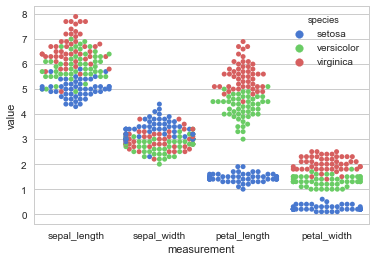

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted")
iris = sns.load_dataset("iris")
iris = pd.melt(iris, "species", var_name="measurement")
sns.swarmplot(x="measurement", y="value", hue="species", data=iris)
plt.show()